In [79]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from datetime import datetime

# Set colors
dc_colors = ["#2B3A64", "#96aae3", "#C3681D", "#EFBD95", "#E73F74", "#80BA5A", "#E68310", "#008695", "#CF1C90", "#f97b72", "#4b4b8f", "#A5AA99"]

# Set template
pio.templates["dc"] = go.layout.Template(
    layout=dict(
    	font={"family": "Poppins, Sans-serif", "color": "#505050"},
        title={"font": {"family": "Poppins, Sans-serif", "color": "black"}, "yanchor": "top", "y": 0.92, "xanchor": "left", "x": 0.025},
    	plot_bgcolor="white",
    	paper_bgcolor="white",
    	hoverlabel=dict(bgcolor="white"),
    	margin=dict(l=100, r=50, t=75, b=70),
        colorway=dc_colors,
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=True, 
                   gridwidth=0.1, 
                   gridcolor='lightgrey', 
                   showline=True,
                   nticks=10,
                   linewidth=1, 
                   linecolor='black', 
                   rangemode="tozero")
    )
) 

In [80]:
# Import yfinance
import yfinance as yf

# Set the date range
start = "2020-01-01"
stop = "2025-04-01"


# Set the ticker we want to use (GameStop)
ticker = "GME"

# Get the data for the ticker GME, use multi_level_index=False
gme = yf.download(ticker, start, stop)

# Preview DataFrame
gme

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME
Date,,,,,
2020-01-02,1.577500,1.617500,1.517500,1.535000,17814400
2020-01-03,1.470000,1.562500,1.460000,1.552500,14175600
2020-01-06,1.462500,1.477500,1.400000,1.450000,13579200
2020-01-07,1.380000,1.457500,1.360000,1.442500,20912000
2020-01-08,1.430000,1.462500,1.352500,1.372500,22517600
...,...,...,...,...,...
2025-03-25,25.400000,25.770000,24.990000,25.700001,10106800
2025-03-26,28.360001,29.799999,27.320000,28.840000,52930500


In [81]:
# Get a numeric summary of the data
gme.describe()

Price,Close,High,Low,Open,Volume
Ticker,GME,GME,GME,GME,GME
count,1318.000000,1318.000000,1318.000000,1318.000000,1.318000e+03
mean,22.911817,24.097064,21.933335,22.986351,2.310639e+07
std,15.094784,16.339313,14.252727,15.300915,5.763883e+07
min,0.700000,0.735000,0.642500,0.712500,1.122700e+06
25%,13.492500,13.912500,13.202500,13.510000,4.228425e+06
50%,22.610001,23.309999,21.980000,22.575000,8.676200e+06
75%,31.000000,32.720000,29.509375,31.007500,1.812770e+07
max,86.877502,120.750000,72.877502,94.927498,7.886316e+08


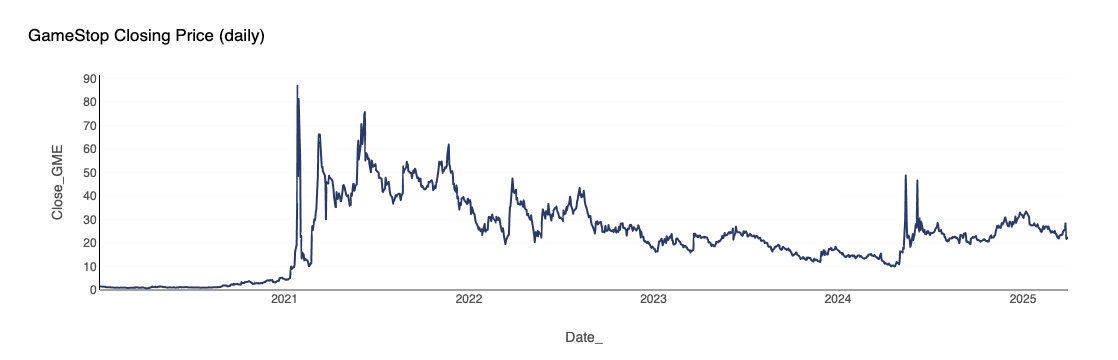

In [82]:
# Step 1: Reset the index
gme_reset = gme.reset_index()

# Step 2: Flatten columns automatically
gme_reset.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in gme_reset.columns]

# Create a Plotly figure
fig = px.line(gme_reset,
              x="Date_",
              y="Close_GME",
              template="dc",
              title="GameStop Closing Price (daily)"
             )

# Show the plot
fig.show()

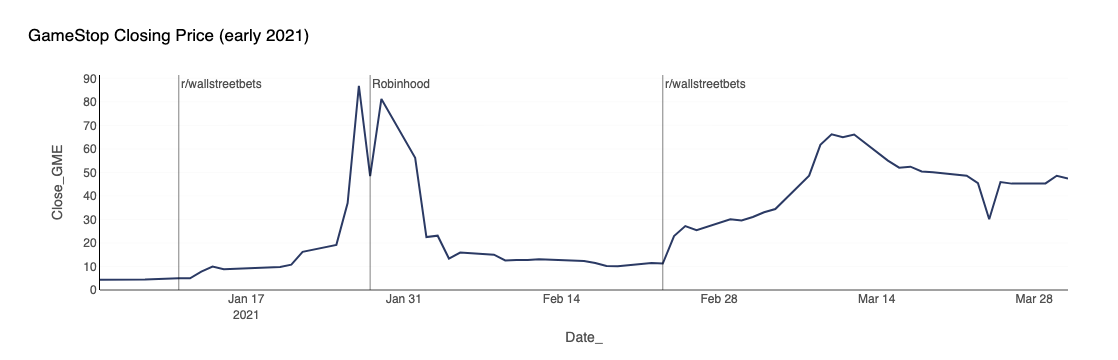

In [83]:
# Create a filtered DataFrame for early 2021
gme_reset["Date_"] = pd.to_datetime(gme_reset["Date_"])
gme_2021 = gme_reset[(gme_reset["Date_"] >= "2021-01-01") & (gme_reset["Date_"] <= "2021-03-31")]


# Create a Plotly figure
fig = px.line(gme_2021,
              x="Date_",
              y="Close_GME",
              template="dc",
              title="GameStop Closing Price (early 2021)"
             )

# Define three key events
short = datetime.strptime("2021-01-11", "%Y-%m-%d").timestamp() * 1000
robin = datetime.strptime("2021-01-28", "%Y-%m-%d").timestamp() * 1000
late_feb = datetime.strptime("2021-02-23", "%Y-%m-%d").timestamp() * 1000

# Add these as lines
fig.add_vline(x=short, line_width=0.5, annotation_text="r/wallstreetbets")
fig.add_vline(x=robin, line_width=0.5, annotation_text="Robinhood")
fig.add_vline(x=late_feb, line_width=0.5, annotation_text="r/wallstreetbets")

# Show the plot
fig.show()

In [ ]:
# Define the candlestick data
candlestick = go.Candlestick(
    x=gme_reset["Date_"],
    open=gme_reset["Open_GME"],
    high=gme_reset["High_GME"],
    low=gme_reset["Low_GME"],
    close=gme_reset["Close_GME"]
)

# Create a candlestick figure   
fig = go.Figure(data=[candlestick])

# Update layout (optional, for better look)
fig.update_layout(
    title="GameStop Candlestick Chart",
    template="dc",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
)

# Show the plot
fig.show()


In [ ]:

# 1. Make sure 'Date_' is datetime
gme_reset["Date_"] = pd.to_datetime(gme_reset["Date_"])

# 2. Apply rolling over 'Date_' using time-based 28 days window
gme_rolling = gme_reset.rolling(window="28D", on="Date_").mean()

# 3. Merge back 'Date_' because rolling drops non-numeric columns
gme_rolling["Date_"] = gme_reset["Date_"]

# Plot the rolling average
fig = px.line(gme_rolling,
              x="Date_",
              y="Close_GME",
              template="dc",
              title="GameStop Closing Price (rolling 28 day mean)"
             )

# Show the plot
fig.show()